In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [3]:
#changing the working directory
%cd /content/gdrive/My Drive/kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/kaggle


In [4]:
# !kaggle competitions download -c dogs-vs-cats

In [5]:
#unzipping the zip files and deleting the zip files
# !unzip \*.zip 

In [6]:
# !rm *.zip

In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
from tensorflow import keras
from tensorflow.keras.utils import load_img
%matplotlib inline
import os
from numpy import asarray
from PIL import Image
import cv2

In [8]:
train_directory = '/content/gdrive/My Drive/kaggle/train'
test_directory = '/content/gdrive/My Drive/kaggle/test1'

In [10]:
img_size=32
train_X=[]
train_y=[]
for images in os.listdir(train_directory):
    img = cv2.imread(train_directory+'/'+images)
    img=cv2.resize(img,(img_size,img_size))
    train_X.append(img)
    if images[:3]=='cat':
        train_y.append(0)
        print("0")
    else:
        train_y.append(1)
        print("1")

test_X=[]

Streaming output truncated to the last 5000 lines.
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1

In [11]:
len(train_X)

25000

In [12]:
train_X=np.array(train_X)

In [13]:
train_X.shape

(25000, 32, 32, 3)

In [14]:
train_y=np.array(train_y)

In [15]:
train_y.shape

(25000,)

In [22]:
classes=['Cat','Dog']

In [23]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

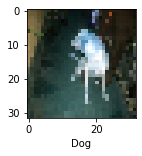

In [26]:
plot_sample(train_X,train_y,20000)

In [27]:
train_X=train_X/255

In [28]:
train_X[0]

array([[[0.01960784, 0.05882353, 0.20392157],
        [0.03529412, 0.0627451 , 0.23921569],
        [0.08235294, 0.1372549 , 0.19607843],
        ...,
        [0.12941176, 0.14509804, 0.2       ],
        [0.00784314, 0.05490196, 0.18039216],
        [0.00392157, 0.03921569, 0.14509804]],

       [[0.01960784, 0.05882353, 0.21176471],
        [0.01568627, 0.07843137, 0.22352941],
        [0.02352941, 0.08627451, 0.23137255],
        ...,
        [0.01960784, 0.05490196, 0.2       ],
        [0.04313725, 0.10588235, 0.15294118],
        [0.02745098, 0.03529412, 0.18039216]],

       [[0.02745098, 0.06666667, 0.21960784],
        [0.01568627, 0.07843137, 0.22352941],
        [0.02352941, 0.08627451, 0.23137255],
        ...,
        [0.02745098, 0.0627451 , 0.20784314],
        [0.02352941, 0.05882353, 0.19215686],
        [0.01176471, 0.05098039, 0.16862745]],

       ...,

       [[0.0745098 , 0.16078431, 0.29803922],
        [0.08627451, 0.17254902, 0.30980392],
        [0.10588235, 0

In [29]:
# We have to add convolution and pooling layer on the raw data
cnn_model=models.Sequential([
#     kernel size is the size of the filter
    layers.Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,activation='relu',kernel_size=(3,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(2,activation='softmax')
])

In [30]:
cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
cnn_model.fit(train_X,train_y,epochs=10)

Epoch 1/10
782/782 [==============================] - 40s 50ms/step - loss: 0.6025 - accuracy: 0.6639
Epoch 2/10
782/782 [==============================] - 36s 47ms/step - loss: 0.5057 - accuracy: 0.7545
Epoch 3/10
782/782 [==============================] - 40s 51ms/step - loss: 0.4639 - accuracy: 0.7805
Epoch 4/10
782/782 [==============================] - 39s 49ms/step - loss: 0.4293 - accuracy: 0.8027
Epoch 5/10
782/782 [==============================] - 39s 50ms/step - loss: 0.4009 - accuracy: 0.8192
Epoch 6/10
782/782 [==============================] - 36s 46ms/step - loss: 0.3640 - accuracy: 0.8361
Epoch 7/10
782/782 [==============================] - 39s 49ms/step - loss: 0.3350 - accuracy: 0.8509
Epoch 8/10
782/782 [==============================] - 36s 46ms/step - loss: 0.2965 - accuracy: 0.8701
Epoch 9/10
782/782 [==============================] - 39s 49ms/step - loss: 0.2681 - accuracy: 0.8865
Epoch 10/10
782/782 [==============================] - 57s 73ms/step - loss: 0.234

In [32]:
cnn_model.evaluate(train_X,train_y)

782/782 [==============================] - 13s 16ms/step - loss: 0.1904 - accuracy: 0.9310


[0.19041304290294647, 0.9309599995613098]

In [34]:
for images in os.listdir(test_directory):
    img = cv2.imread(test_directory+'/'+images)
    img=cv2.resize(img,(img_size,img_size))
    test_X.append(img)

In [37]:
test_X=np.array(test_X)

In [38]:
test_X.shape

(12500, 32, 32, 3)

In [39]:
y_predicted=cnn_model.predict(test_X)
y_predicted_max=[np.argmax(element) for element in y_predicted]
y_predicted[:5]

391/391 [==============================] - 6s 16ms/step


array([[9.9999994e-01, 2.1923214e-31],
       [9.9999994e-01, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 9.9999994e-01],
       [1.2377527e-25, 9.9999994e-01]], dtype=float32)

In [40]:
y_predicted_max[:5]

[0, 0, 1, 1, 1]

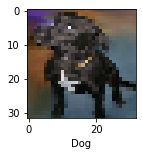

In [45]:
plot_sample(test_X,y_predicted_max,7)